In [918]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [919]:
# see all the csv files in the directory
import os
files = os.listdir("company")


In [920]:
required_file = files[38]
required_file

'NUBL.csv'

In [921]:
df = pd.read_csv(f'company/{required_file}')

In [922]:
df.head()

,SN,Date,LTP,%change,High,Low,Open,Qty.,Turnover
0,1,2023/12/28,621.10,1.47,625.00,610.00,610.00,"10,045","6,212,714.60"
1,2,2023/12/27,612.10,-2.86,641.90,611.00,630.00,"14,238","8,848,165.10"
2,3,2023/12/24,630.10,-2.01,645.00,630.00,633.00,"20,814","13,258,422.80"
3,4,2023/12/21,643.00,-1.09,663.00,632.10,663.00,"22,642","14,577,075.20"
4,5,2023/12/20,650.10,-1.50,680.00,642.00,673.20,"18,703","12,187,831.10"


In [923]:
# remove the comlun with name
df = df.drop(['SN'], axis=1)




In [924]:
# check the data type
df.dtypes

Date         object
LTP          object
%change     float64
High         object
Low          object
Open         object
Qty.         object
Turnover     object
dtype: object

In [925]:
# make the qty and turnover to float
df['Qty.'] = df['Qty.'].replace(',','', regex=True).astype(float)
df['Turnover'] = df['Turnover'].replace(',','', regex=True).astype(float)
df['LTP'] = df['LTP'].replace(',','', regex=True).astype(float)
df['Open'] = df['Open'].replace(',','', regex=True).astype(float)
df['High'] = df['High'].replace(',','', regex=True).astype(float)
df['Low'] = df['Low'].replace(',','', regex=True).astype(float)
df['Qty.'], df['Turnover']

(0       10045.0
 1       14238.0
 2       20814.0
 3       22642.0
 4       18703.0
          ...   
 1947     3373.0
 1948      992.0
 1949     1185.0
 1950      762.0
 1951      193.0
 Name: Qty., Length: 1952, dtype: float64,
 0        6212714.6
 1        8848165.1
 2       13258422.8
 3       14577075.2
 4       12187831.1
            ...    
 1947     5438720.0
 1948     1381044.0
 1949     1620878.0
 1950     1088458.0
 1951      289135.0
 Name: Turnover, Length: 1952, dtype: float64)

In [926]:
df.dtypes

Date         object
LTP         float64
%change     float64
High        float64
Low         float64
Open        float64
Qty.        float64
Turnover    float64
dtype: object

In [927]:
df.head()

,Date,LTP,%change,High,Low,Open,Qty.,Turnover
0,2023/12/28,621.1,1.47,625.0,610.0,610.0,10045.0,6212714.6
1,2023/12/27,612.1,-2.86,641.9,611.0,630.0,14238.0,8848165.1
2,2023/12/24,630.1,-2.01,645.0,630.0,633.0,20814.0,13258422.8
3,2023/12/21,643.0,-1.09,663.0,632.1,663.0,22642.0,14577075.2
4,2023/12/20,650.1,-1.50,680.0,642.0,673.2,18703.0,12187831.1


In [928]:
df['Date'] = pd.to_datetime(df['Date'])

In [929]:
df['Date']

0      2023-12-28
1      2023-12-27
2      2023-12-24
3      2023-12-21
4      2023-12-20
          ...    
1947   2014-08-12
1948   2014-08-05
1949   2014-08-04
1950   2014-08-03
1951   2014-07-31
Name: Date, Length: 1952, dtype: datetime64[ns]

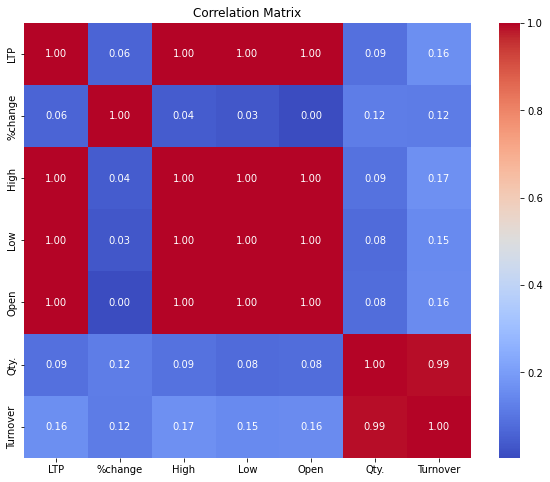

In [930]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

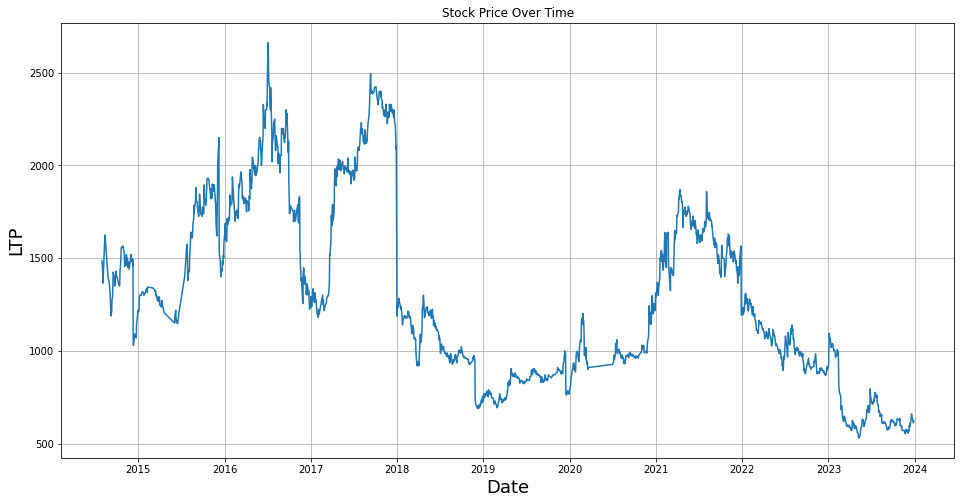

In [931]:
# Plotting "Date" against "LTP"-Last Trade Price
plt.figure(figsize=(16,8))
plt.title('Stock Price Over Time')
plt.xlabel('Date', fontsize=18)
plt.ylabel('LTP', fontsize=18)
plt.plot(df['Date'], df['LTP'])
# make grid lines
plt.grid(True)
plt.show()



In [932]:
df['%change']

0       1.47
1      -2.86
2      -2.01
3      -1.09
4      -1.50
        ... 
1947    1.25
1948    2.20
1949   -4.21
1950   -4.04
1951   -3.45
Name: %change, Length: 1952, dtype: float64

In [933]:
df['Month'] = df['Date'].dt.month

In [934]:
df.groupby('Month').mean()

,LTP,%change,High,Low,Open,Qty.,Turnover
Month,,,,,,,
1,1204.675581,0.398663,1218.794186,1186.869186,1200.724419,8880.139535,1.110376e+07
2,1197.734965,-0.097622,1216.665734,1181.418182,1199.542657,14443.573427,2.028999e+07
3,1176.930921,0.048224,1192.419079,1158.570395,1176.108553,8726.157895,1.174856e+07
4,1274.803597,0.401295,1296.406475,1252.335252,1271.130935,7799.064748,1.223690e+07
5,1352.474648,-0.037958,1367.947183,1337.823944,1355.900704,5660.387324,7.868996e+06
6,1345.528571,0.201688,1363.537662,1330.840909,1344.910390,8117.707792,1.057069e+07
7,1298.259322,0.115537,1316.609040,1277.590395,1297.699435,12746.310734,1.812954e+07
8,1318.179787,-0.192074,1333.675532,1305.175000,1319.768085,10723.021277,1.637296e+07
9,1314.360920,-0.018161,1331.910920,1302.741954,1318.501724,5324.517241,7.617714e+06


In [935]:
monthly_change = df.groupby('Month').mean()['%change']
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_change.index = monthly_change.index.map(month_names)
monthly_change

Month
Jan    0.398663
Feb   -0.097622
Mar    0.048224
Apr    0.401295
May   -0.037958
Jun    0.201688
Jul    0.115537
Aug   -0.192074
Sep   -0.018161
Oct    0.097014
Nov   -0.187977
Dec    0.343918
Name: %change, dtype: float64

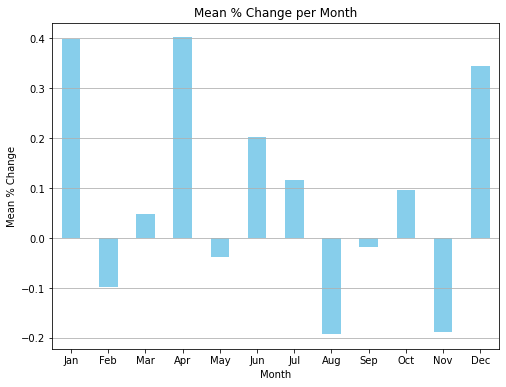

In [936]:
# Plotting month against the mean %change
plt.figure(figsize=(8, 6))
monthly_change.plot(kind='bar', color='skyblue')
plt.title('Mean % Change per Month')
plt.xlabel('Month')
plt.ylabel('Mean % Change')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


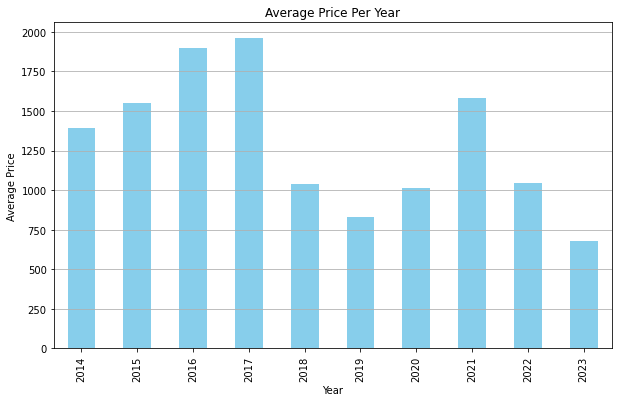

In [937]:
# Price average for each year
year = df['Date'].dt.year
average_price_per_year = df.groupby(year)['LTP'].mean()

# Plotting the bar diagram
plt.figure(figsize=(10, 6))
average_price_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.show()


In [938]:
# Analyzing percentage change (%change)
df['Fluctuation'] = df['%change'].abs()  # Absolute value for fluctuations
threshold_fluctuation = 2.0  # Define your threshold for significant fluctuations
significant_fluctuations = df[df['Fluctuation'] > threshold_fluctuation]

In [939]:
df["Fluctuation"] = df['%change']
threshold_fluctuation = 2.0
significant_fluctuation = df[df['Fluctuation']> 2]
significant_fluctuations[['Date', '%change']]


,Date,%change
1,2023-12-27,-2.86
2,2023-12-24,-2.01
6,2023-12-17,4.45
11,2023-12-10,5.82
13,2023-12-06,3.50
...,...,...
1945,2014-08-24,-3.92
1948,2014-08-05,2.20
1949,2014-08-04,-4.21
1950,2014-08-03,-4.04


In [940]:
print("Periods of significant fluctuations:")
print(significant_fluctuations[['Date', 'Fluctuation']].head(20))

Periods of significant fluctuations:
         Date  Fluctuation
1  2023-12-27         2.86
2  2023-12-24         2.01
6  2023-12-17         4.45
11 2023-12-10         5.82
13 2023-12-06         3.50
20 2023-11-27         2.08
21 2023-11-26         3.96
24 2023-11-21         2.54
26 2023-11-09         3.76
32 2023-11-01         3.71
33 2023-10-31         2.50
37 2023-10-18         2.30
54 2023-09-21         4.11
58 2023-09-13         2.43
61 2023-09-07         2.70
64 2023-09-03         2.84
75 2023-08-15         5.15
80 2023-08-08         3.00
84 2023-08-02         3.18
85 2023-08-01         2.54


In [941]:
data =df.copy()

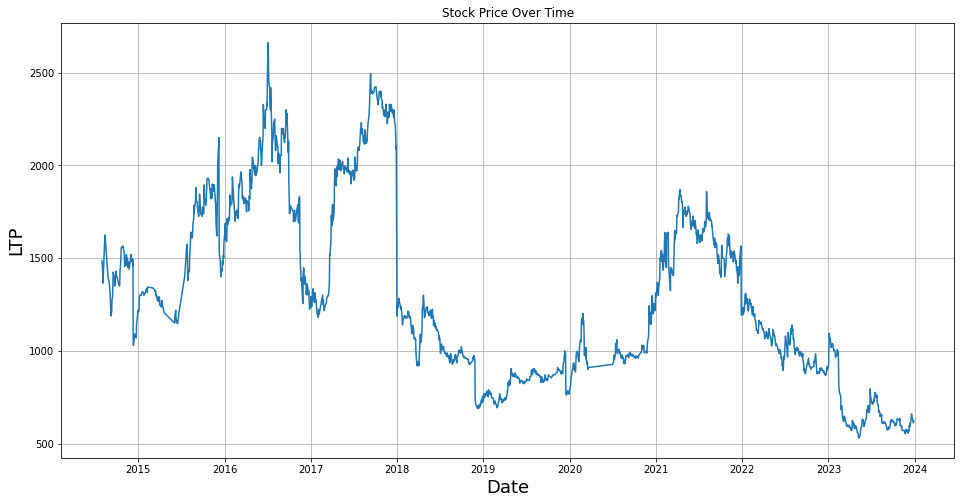

In [942]:
# Plotting "Date" against "LTP"-Last Trade Price
plt.figure(figsize=(16,8))
plt.title('Stock Price Over Time')
plt.xlabel('Date', fontsize=18)
plt.ylabel('LTP', fontsize=18)
plt.plot(df['Date'], df['LTP'])
# make grid lines
plt.grid(True)
plt.show()

# Find the Share Upto given Year

In [943]:
df_given_year = data[data['Date'].dt.year >= 2022]


In [944]:
mean = df_given_year['LTP'].mean()
median = df_given_year['LTP'].median()
mode = df_given_year['LTP'].mode()[0]
std = df_given_year['LTP'].std()
max_value = df_given_year['LTP'].max()
min_value = df_given_year['LTP'].min()
print("Maximum: ", max_value)
print("Minimum: ", min_value)
print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std)

Maximum:  1310.0
Minimum:  530.0
Mean:  865.6780172413793
Median:  905.0
Mode:  600.0
Standard Deviation:  222.54836014733408


Maximum price:  2662.0
Minimum price:  530.0
Mean price:  1277.5481045081967
Median price:  1167.0
Standard Deviation of price:  484.52225032231456
0    621.1
1    612.1
2    630.1
3    643.0
4    650.1
5    660.0
6    632.0
7    605.1
8    610.0
9    599.0
Name: LTP, dtype: float64


C:\Users\baral\AppData\Local\Temp\ipykernel_21228\2351986036.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LTP'], color='skyblue')


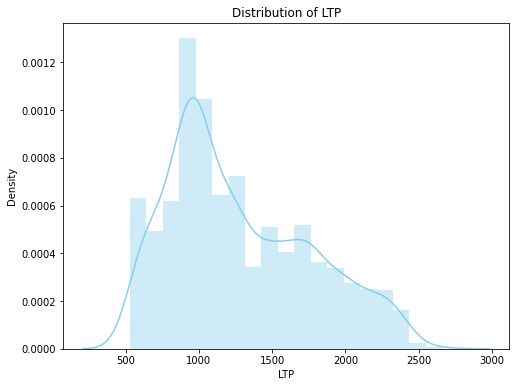

In [945]:
maximum_price = df['LTP'].max()
minimum_price = df['LTP'].min()
mean_price = df['LTP'].mean()
median_price = df['LTP'].median()
std_price = df['LTP'].std()

print("Maximum price: ", maximum_price)
print("Minimum price: ", minimum_price)
print("Mean price: ", mean_price)
print("Median price: ", median_price)
print("Standard Deviation of price: ", std_price)
print(df['LTP'].head(10))
# Plotting the distribution of the LTP
plt.figure(figsize=(8, 6))
sns.distplot(df['LTP'], color='skyblue')
plt.title('Distribution of LTP')
plt.xlabel('LTP')
plt.ylabel('Density')
plt.show()



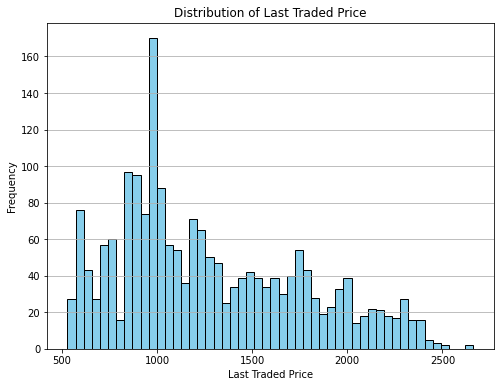

In [946]:
plt.figure(figsize=(8, 6))
plt.hist(df['LTP'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Last Traded Price')
plt.xlabel('Last Traded Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


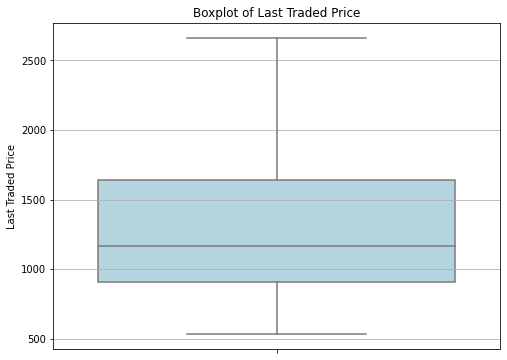

In [947]:
import seaborn as sns

# Plotting a boxplot to visualize the distribution and outliers of 'LTP' (Last Traded Price)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['LTP'], color='lightblue')
plt.title('Boxplot of Last Traded Price')
plt.ylabel('Last Traded Price')
plt.grid(axis='y')
plt.show()


In [948]:
from statsmodels.tsa.arima.model import ARIMA
reverse_ltp = df['LTP'].iloc[::-1]
model = ARIMA(reverse_ltp, order=(5, 1, 0))
model_fit = model.fit()


In [949]:
forecast = model_fit.forecast(steps=10)

In [950]:
forecast, df["LTP"].head(1)

(-1     622.288495
 -2     622.422361
 -3     623.179243
 -4     623.322750
 -5     623.108524
 -6     623.074686
 -7     623.057919
 -8     623.038425
 -9     623.040645
 -10    623.046084
 Name: predicted_mean, dtype: float64,
 0    621.1
 Name: LTP, dtype: float64)

In [951]:
# Daily_volatility i.e Fluctuation of Share Price(Standard Deviation)
daily_volatility = df['LTP'].pct_change().rolling(window=20).std()
daily_volatility

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1947    0.047633
1948    0.058139
1949    0.058375
1950    0.058693
1951    0.059323
Name: LTP, Length: 1952, dtype: float64

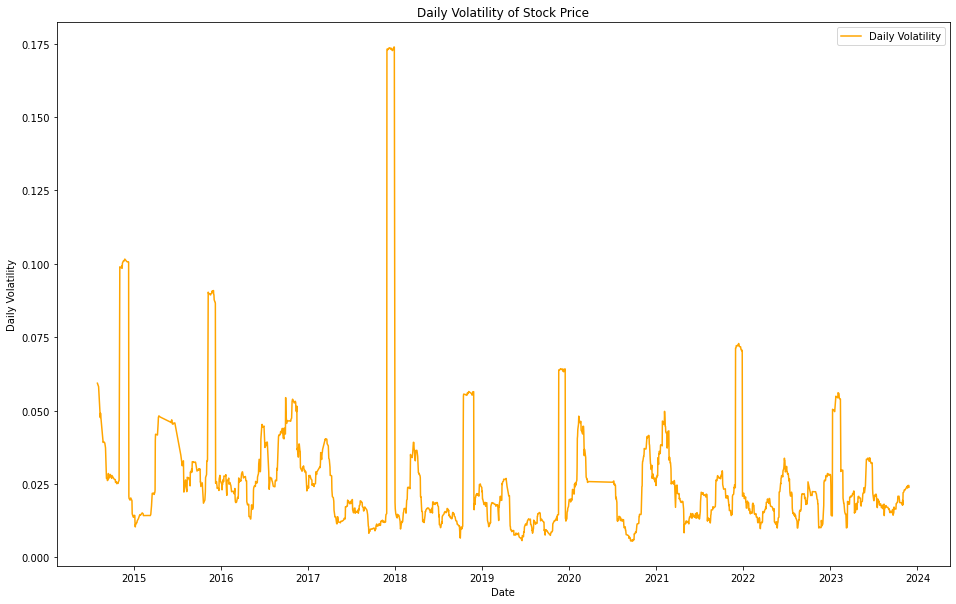

In [952]:
plt.figure(figsize=(16, 10))
plt.plot(df["Date"], daily_volatility, label='Daily Volatility', color='orange')
# plt.plot(df["Date"].head(100), daily_volatility.head(100), label='Daily Volatility', color='orange')
plt.title('Daily Volatility of Stock Price')
plt.xlabel('Date')
plt.ylabel('Daily Volatility')
plt.legend()
plt.show()

In [953]:
df.set_index('Date', inplace=True)
df

,LTP,%change,High,Low,Open,Qty.,Turnover,Month,Fluctuation
Date,,,,,,,,,
2023-12-28,621.1,1.47,625.0,610.0,610.0,10045.0,6212714.6,12,1.47
2023-12-27,612.1,-2.86,641.9,611.0,630.0,14238.0,8848165.1,12,-2.86
2023-12-24,630.1,-2.01,645.0,630.0,633.0,20814.0,13258422.8,12,-2.01
2023-12-21,643.0,-1.09,663.0,632.1,663.0,22642.0,14577075.2,12,-1.09
2023-12-20,650.1,-1.50,680.0,642.0,673.2,18703.0,12187831.1,12,-1.50
...,...,...,...,...,...,...,...,...,...
2014-08-12,1621.0,1.25,1664.0,1600.0,1601.0,3373.0,5438720.0,8,1.25
2014-08-05,1395.0,2.20,1407.0,1370.0,1365.0,992.0,1381044.0,8,2.20
2014-08-04,1365.0,-4.21,1397.0,1350.0,1425.0,1185.0,1620878.0,8,-4.21


In [954]:
# Monthly Volatility
monthly_volatility = df['LTP'].resample('M').std()
# Yesle chai harey month ma vako volatility wa fluctuation lai dekhauxa
monthly_volatility.shape

(114,)

In [955]:
monthly_volatility

Date
2014-07-31           NaN
2014-08-31    108.145405
2014-09-30     77.399397
2014-10-31     91.684538
2014-11-30     27.072315
                 ...    
2023-08-31     27.733168
2023-09-30     19.981908
2023-10-31     11.736648
2023-11-30     15.596900
2023-12-31     32.125518
Freq: M, Name: LTP, Length: 114, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


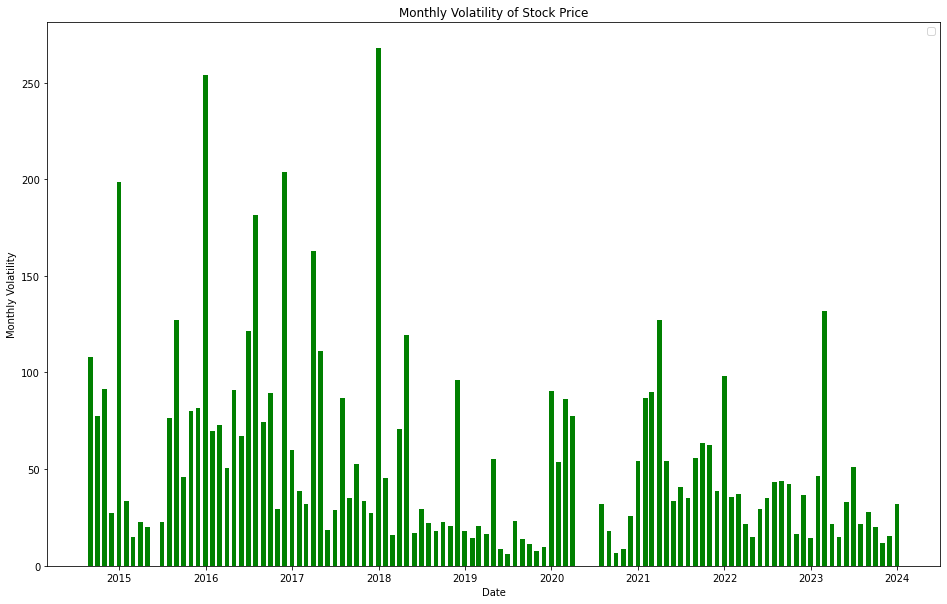

In [956]:
plt.figure(figsize=(16, 10))
plt.bar(monthly_volatility.index, monthly_volatility, color='green', alpha=1, width=20)
plt.title('Monthly Volatility of Stock Price')
plt.xlabel('Date')
plt.ylabel('Monthly Volatility')
plt.legend()
plt.show()


In [957]:
monthly_change = df['%change'].resample('M').mean()


In [958]:
monthly_change

Date
2014-07-31   -3.450000
2014-08-31   -1.661250
2014-09-30    0.679231
2014-10-31    1.176364
2014-11-30   -0.766923
                ...   
2023-08-31   -0.672381
2023-09-30    0.129333
2023-10-31   -0.064118
2023-11-30   -0.551875
2023-12-31    0.321176
Freq: M, Name: %change, Length: 114, dtype: float64

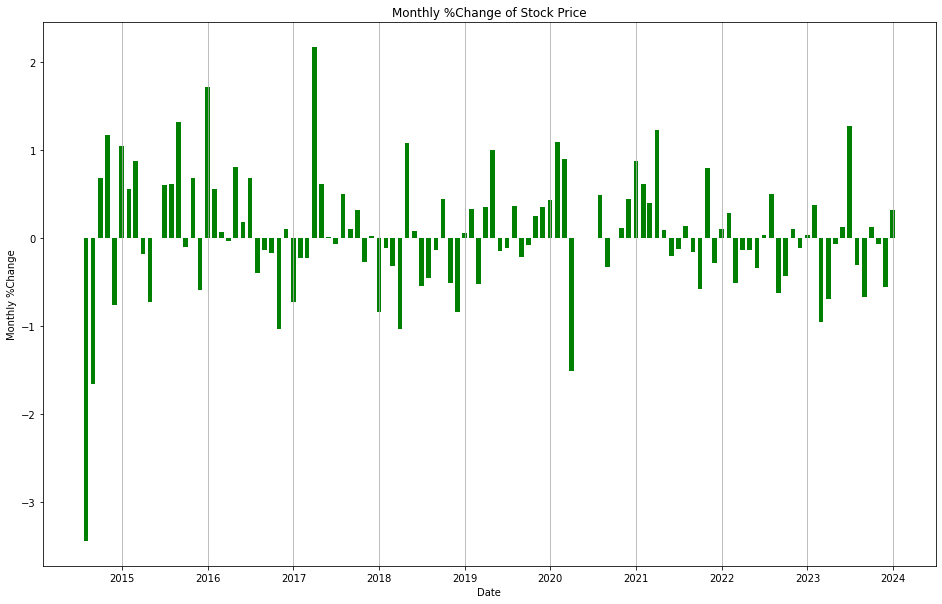

In [959]:
# Plot the monthly %change
plt.figure(figsize=(16, 10))
plt.bar(monthly_change.index, monthly_change, color='green', width=20)
plt.title('Monthly %Change of Stock Price')
plt.xlabel('Date')
plt.ylabel('Monthly %Change')
# grid along x_axis
plt.grid(axis='x')
plt.show()

In [960]:
df_reverse = df[::-1]
# this is done to arrange it according to the old date to new date
df_reverse

,LTP,%change,High,Low,Open,Qty.,Turnover,Month,Fluctuation
Date,,,,,,,,,
2014-07-31,1485.0,-3.45,1510.0,1485.0,1538.0,193.0,289135.0,7,-3.45
2014-08-03,1425.0,-4.04,1460.0,1410.0,1485.0,762.0,1088458.0,8,-4.04
2014-08-04,1365.0,-4.21,1397.0,1350.0,1425.0,1185.0,1620878.0,8,-4.21
2014-08-05,1395.0,2.20,1407.0,1370.0,1365.0,992.0,1381044.0,8,2.20
2014-08-12,1621.0,1.25,1664.0,1600.0,1601.0,3373.0,5438720.0,8,1.25
...,...,...,...,...,...,...,...,...,...
2023-12-20,650.1,-1.50,680.0,642.0,673.2,18703.0,12187831.1,12,-1.50
2023-12-21,643.0,-1.09,663.0,632.1,663.0,22642.0,14577075.2,12,-1.09
2023-12-24,630.1,-2.01,645.0,630.0,633.0,20814.0,13258422.8,12,-2.01


Moving Average of 50 days and 200 days

In [961]:
ma_20 = df_reverse['LTP'].rolling(window=20).mean()
ma_50 = df_reverse['LTP'].rolling(window=50).mean()
ma_100 = df_reverse['LTP'].rolling(window=100).mean()
ma_200 = df_reverse['LTP'].rolling(window=200).mean()


In [962]:
# show the ma_20, ma_50, ma_100, ma_200 in table form
ma_20, ma_50

(Date
 2014-07-31        NaN
 2014-08-03        NaN
 2014-08-04        NaN
 2014-08-05        NaN
 2014-08-12        NaN
                ...   
 2023-12-20    586.785
 2023-12-21    590.935
 2023-12-24    594.690
 2023-12-27    596.445
 2023-12-28    599.250
 Name: LTP, Length: 1952, dtype: float64,
 Date
 2014-07-31        NaN
 2014-08-03        NaN
 2014-08-04        NaN
 2014-08-05        NaN
 2014-08-12        NaN
                ...   
 2023-12-20    599.264
 2023-12-21    599.564
 2023-12-24    599.808
 2023-12-27    599.450
 2023-12-28    599.310
 Name: LTP, Length: 1952, dtype: float64)

In [963]:
ma_100, ma_200

(Date
 2014-07-31        NaN
 2014-08-03        NaN
 2014-08-04        NaN
 2014-08-05        NaN
 2014-08-12        NaN
                ...   
 2023-12-20    631.301
 2023-12-21    630.611
 2023-12-24    629.742
 2023-12-27    628.593
 2023-12-28    627.622
 Name: LTP, Length: 1952, dtype: float64,
 Date
 2014-07-31         NaN
 2014-08-03         NaN
 2014-08-04         NaN
 2014-08-05         NaN
 2014-08-12         NaN
                 ...   
 2023-12-20    643.0450
 2023-12-21    641.3900
 2023-12-24    639.6655
 2023-12-27    637.8510
 2023-12-28    635.9215
 Name: LTP, Length: 1952, dtype: float64)

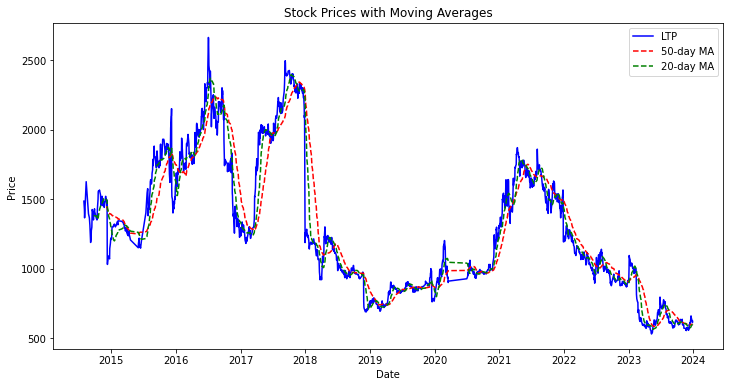

In [964]:
plt.figure(figsize=(12, 6))
plt.plot(df_reverse.index, df_reverse['LTP'], label='LTP', color='blue')
plt.plot(df_reverse.index, ma_50, label='50-day MA', color='red', linestyle='--')
plt.plot(df_reverse.index, ma_20, label='20-day MA', color='green', linestyle='--')
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [965]:
from ta.momentum import RSIIndicator

C:\Users\baral\AppData\Local\Temp\ipykernel_21228\354248743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reverse['RSI'] = rsi.rsi()


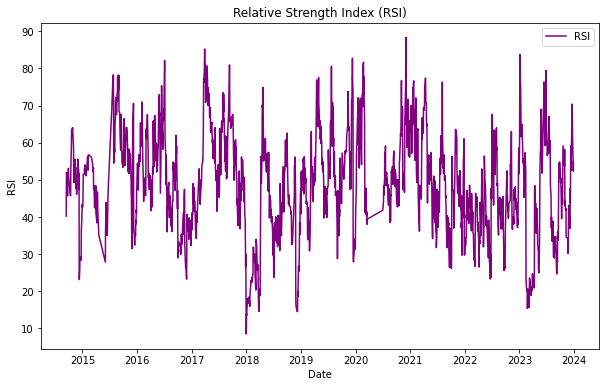

In [966]:
# Calculate RSI
# The RSI oscillates between zero and 100. Traditionally,
# an RSI reading of 70 or above indicates an
# overbought situation, and a reading of 30 or
# below indicates an oversold condition1.
rsi_period = 14
rsi = RSIIndicator(df_reverse['LTP'], window=rsi_period)
df_reverse['RSI'] = rsi.rsi()

plt.figure(figsize=(10, 6))
plt.plot(df_reverse.index, df_reverse['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

C:\Users\baral\AppData\Local\Temp\ipykernel_21228\914170198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reverse['Rolling_min'] = df_reverse['LTP'].rolling(window=10).min()


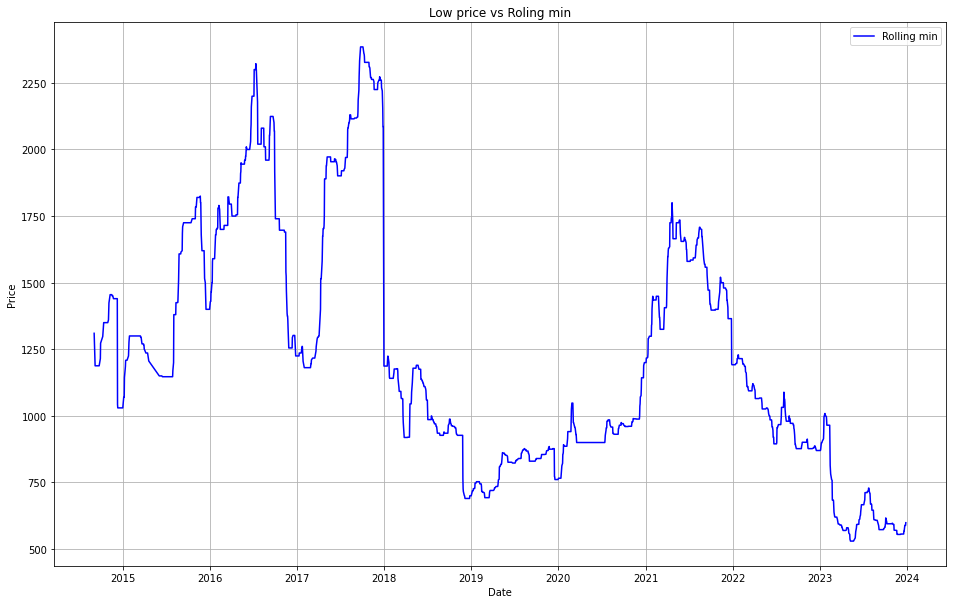

In [967]:
df_reverse['Rolling_min'] = df_reverse['LTP'].rolling(window=10).min()
plt.figure(figsize=(16,10))
plt.plot(df_reverse.index, df_reverse['Rolling_min'],label= "Rolling min",color='blue')
plt.title('Low price vs Roling min')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



In [968]:
df_reverse['Rolling_min'].tail(10), df_reverse['LTP'].tail(10)

(Date
 2023-12-12    556.5
 2023-12-13    556.5
 2023-12-14    556.5
 2023-12-17    556.5
 2023-12-19    556.5
 2023-12-20    567.0
 2023-12-21    567.0
 2023-12-24    589.0
 2023-12-27    589.0
 2023-12-28    599.0
 Name: Rolling_min, dtype: float64,
 Date
 2023-12-12    599.0
 2023-12-13    610.0
 2023-12-14    605.1
 2023-12-17    632.0
 2023-12-19    660.0
 2023-12-20    650.1
 2023-12-21    643.0
 2023-12-24    630.1
 2023-12-27    612.1
 2023-12-28    621.1
 Name: LTP, dtype: float64)